# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [10]:
# Checking the number of mice.
num_mice = len(merged_data["Mouse ID"].unique())
print(num_mice)

249


In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data[merged_data.duplicated(["Mouse ID", "Timepoint"])]

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep=False)

clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = len(clean_data["Mouse ID"].unique())
print(num_mice_clean)

249


## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor_volume = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_volume = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_tumor_volume = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_dev_tumor_volume = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor_volume = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

#single summary dataframe: 
summary_stats = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": variance_tumor_volume,
    "Tumor Volume Std. Dev.": std_dev_tumor_volume,
    "Tumor Volume SEM": sem_tumor_volume
})

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [30]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"]).rename(columns={"mean": "Mean", "median": "Median", "var": "Variance", "std": "Standard Deviation", "sem": "SEM"})

summary_statistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: title={'center': 'Total Timepoints for Each Drug Regimen'}>

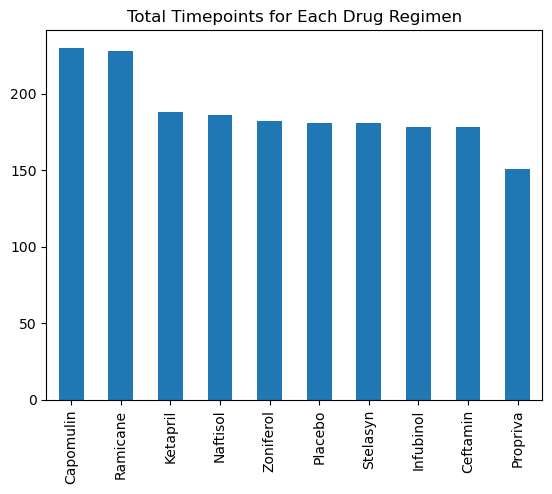

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoints_pandas = clean_data["Drug Regimen"].value_counts()
timepoints_pandas.plot(kind="bar", title="Total Timepoints for Each Drug Regimen")

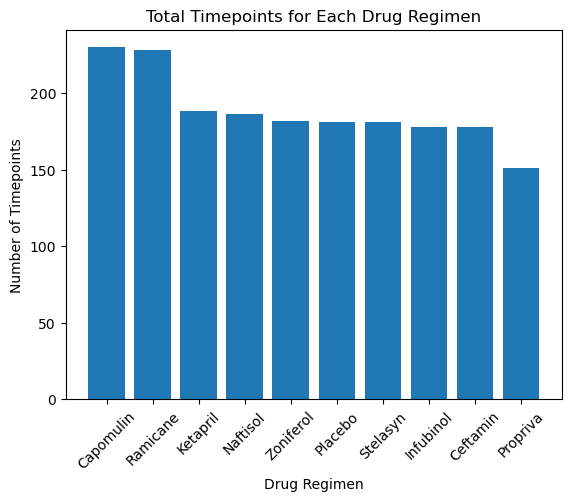

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoints_pyplot = clean_data["Drug Regimen"].value_counts()
plt.bar(timepoints_pyplot.index, timepoints_pyplot.values)
plt.title("Total Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.xticks(rotation=45)
plt.show()

<Axes: title={'center': 'Distribution of Female vs. Male Mice'}, ylabel='Sex'>

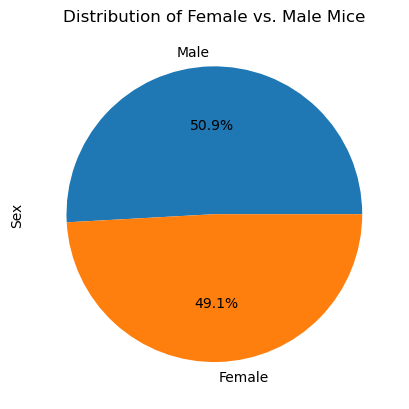

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_pandas = clean_data["Sex"].value_counts()
gender_pandas.plot(kind="pie", autopct="%1.1f%%", title="Distribution of Female vs. Male Mice")

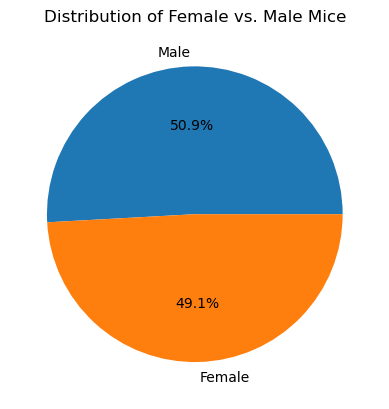

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_pyplot = clean_data["Sex"].value_counts()
plt.pie(gender_pyplot.values, labels=gender_pyplot.index, autopct="%1.1f%%")
plt.title("Distribution of Female vs. Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_data.groupby("Mouse ID")["Timepoint"].max()
last_timepoint_df = pd.DataFrame({"Timepoint": last_timepoint})

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(clean_data, last_timepoint_df, on=["Mouse ID", "Timepoint"], how="inner")

merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


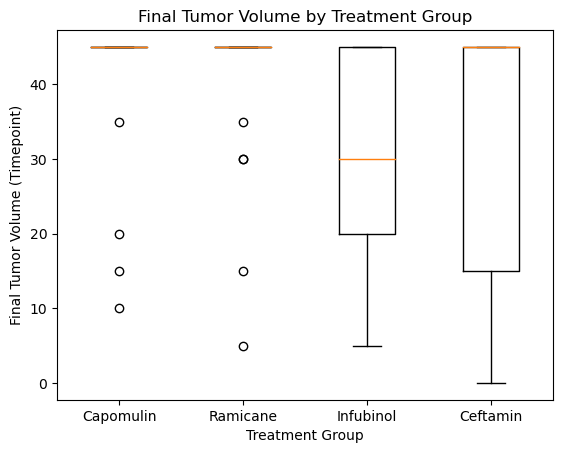

In [33]:
# Create a DataFrame with the last timepoint for each mouse ID using groupby
last_timepoint = clean_data.groupby("Mouse ID")["Timepoint"].max()
last_timepoint_df = pd.DataFrame({"Timepoint": last_timepoint})

# Reset the index of the DataFrame
last_timepoint_df = last_timepoint_df.reset_index()

# Retrieve the maximum timepoint for each mouse
max_timepoint = last_timepoint_df["Timepoint"]

# Define the four treatment groups
treatment_groups = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create an empty list to fill with tumor volume data
tumor_volume_data = []

# Iterate over the treatment groups
for treatment in treatment_groups:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = last_timepoint_df.loc[last_timepoint_df["Mouse ID"].isin(clean_data.loc[clean_data["Drug Regimen"] == treatment]["Mouse ID"]), "Timepoint"]
    
    # Add subset
    tumor_volume_data.append(tumor_volume)

# Determine outliers using upper and lower bounds
outliers = []
for data in tumor_volume_data:
    quartiles = data.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Check for outliers
    outliers.append(data.loc[(data < lower_bound) | (data > upper_bound)])

# Create a box plot that shows the distribution of the final tumor volume for each treatment group
plt.boxplot(tumor_volume_data, labels=treatment_groups)
plt.title("Final Tumor Volume by Treatment Group")
plt.xlabel("Treatment Group")
plt.ylabel("Final Tumor Volume (Timepoint)")
plt.show()


## Line and Scatter Plots

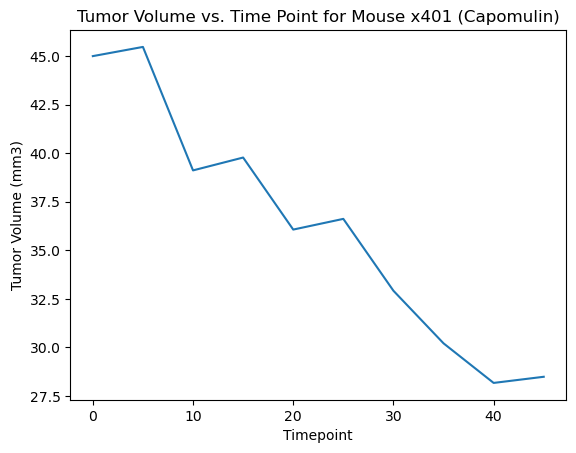

In [26]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin") & (clean_data["Mouse ID"] == "x401")]
plt.plot(capomulin_mouse["Timepoint"], capomulin_mouse["Tumor Volume (mm3)"])
plt.title("Tumor Volume vs. Time Point for Mouse x401 (Capomulin)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


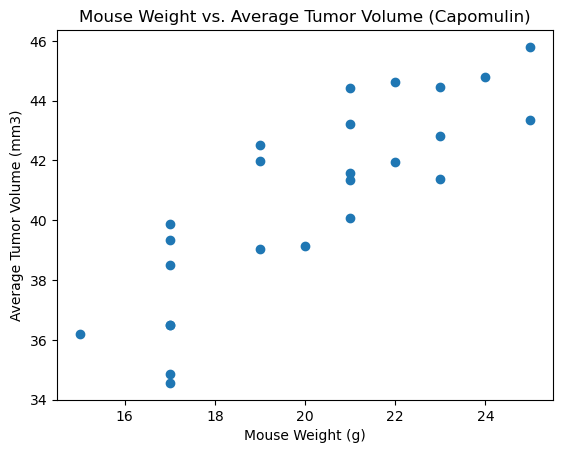

In [27]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

plt.scatter(mouse_weight, average_tumor_volume)
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

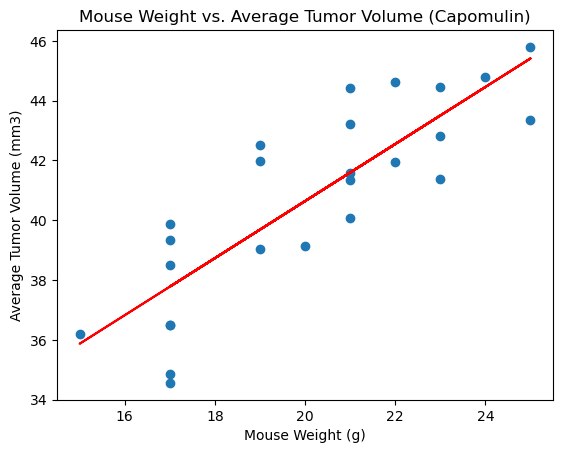

Correlation Coefficient: 0.841936342469472
Linear Regression Equation: y = 0.9544396890241049 x + 21.552160532685008


In [28]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient = st.pearsonr(mouse_weight, average_tumor_volume)[0]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, average_tumor_volume)
regress_values = mouse_weight * slope + intercept

plt.scatter(mouse_weight, average_tumor_volume)
plt.plot(mouse_weight, regress_values, color="red")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

print("Correlation Coefficient:", correlation_coefficient)
print("Linear Regression Equation: y =", slope, "x +", intercept)